In [1]:
import os
import datetime
import sys
import random
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import chain

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.merge import concatenate
from keras.models import Model, load_model
from keras.layers import Input, Layer, InputSpec
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D

In [6]:
CFG = {
    'dataset_path': '../data',
    'model_storage': '../dump'
}

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
NUM_SAMPLES = 3083

## Uplodading data

In [7]:
y = np.load(f'{CFG["dataset_path"]}/y_train.npy')
x = np.load(f'{CFG["dataset_path"]}/x_train.npy')

## Uploading trained model

In [8]:
model = tf.keras.models.load_model(f'{CFG["model_storage"]}/unet_tasks_binary_ce.h5', 
    custom_objects={
        'IoU': None,
        'IoU_class_0': None,
        'IoU_class_1': None,
        'IoU_class_2': None,
    })

2021-12-05 15:25:25.053026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 15:25:25.159325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-12-05 15:25:25.159359: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-12-05 15:25:25.160791: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [9]:
import matplotlib.pyplot as plt 
pred = model.predict(x[500:800])

2021-12-05 15:25:43.423842: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-05 15:25:43.872090: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-12-05 15:25:44.043820: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-12-05 15:25:45.204411: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-12-05 15:25:45.525978: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 134217728 exceeds 10% of free system memory.
2021-12-05 15:25:45.674467: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 268435456 exceeds 10% of free system memory.


In [10]:
pred = (pred*255).astype('uint8')





$$Softmax = \frac{\exp{p_i}} {\sum_{p_j}\exp{p_j}}$$

$$CrossEntropy_{Categorical} = -\sum_{i=1}^{N} w_i * y_i \log{p_i}$$


$$CrossEntropy_{Binary} = -\sum_{i=1}^{N} y_i \log{p_i} - {(1-y_i)} \log{(1-p_i)}$$

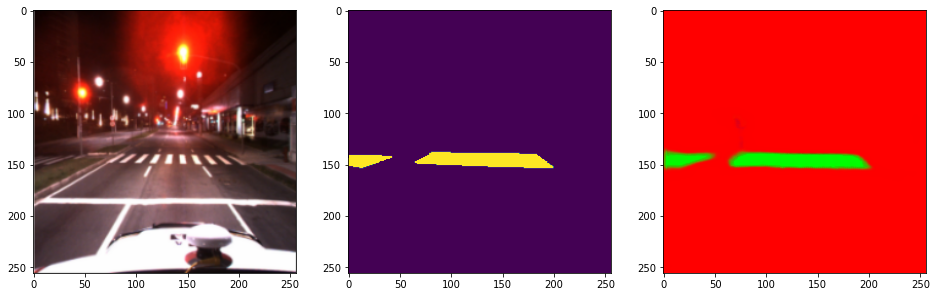

In [113]:
def inspect_image(idx):
    fig, axs = plt.subplots(1,3, figsize=(16,6))
    axs[0].imshow(x[idx + 500])
    axs[1].imshow(y[idx + 500])
    axs[2].imshow(pred[idx])

inspect_image(167)